# Checking consistency between figures and model output

In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [ ]:
Calculating f1'

𝑓′1≈−0.75/(𝜀𝜎𝑇¯4s(1−𝑎𝐶2))

In [ ]:
a = 0.4
a = 0.8

In [213]:
-0.75 / (0.97 * 5.67e-8 * 301 ** 4 * (1 - 0.8 * 0.6 ** 2))

-0.0023332458079438085

In [7]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [8]:
import os
import xarray as xr
import matplotlib.pyplot as plt

In [228]:
# Get the helper functions
from src.models.model_setup import ModelSetup
from src.xr_utils import open_dataset, open_dataarray, get_trend, clip, can_coords, sel
from src.utils import get_default_setup
from src.configs.load_config import load_config
from src.plot_utils import add_units, cmap, get_dim, label_subplots
from src.plot_utils import cmap, get_dim
from src.constants import UC_LOGS, FIGURE_DATA_PATH
uncoupled_run_dir = str(UC_LOGS / "it_1")
uc_2_dr = str(UC_LOGS / "pap_2")
cfg = load_config(test=False)
fig_data = xr.open_dataset(FIGURE_DATA_PATH)
uc2_stp = ModelSetup(uc_2_dr, cfg, make_move=False)
uc_f1_stp = ModelSetup(str(UC_LOGS / "diff_f1prime_no_ingrid"), cfg, make_move=False)
uncoup_setup = ModelSetup(uncoupled_run_dir, cfg, make_move=False)
coup_setup = get_default_setup()

In [256]:
def comp_plot(ours: xr.DataArray, papers: xr.DataArray, default_cmap="delta", diff_cmap="delta", **kwargs) -> None:
    ours, papers = add_units(ours), add_units(papers)
    fig, axs = plt.subplots(4, figsize=get_dim(ratio=0.3*4), sharex=True)
    ours.plot(ax=axs[0], cmap=cmap(default_cmap), **kwargs)
    axs[0].set_xlabel("")
    papers.plot(ax=axs[1], cmap=cmap(default_cmap), **kwargs)
    axs[1].set_xlabel("")
    (ours - papers).plot(ax=axs[2], cmap=cmap(diff_cmap), **kwargs)
    axs[2].set_xlabel("")
    np.abs((ours - papers)/papers).plot(ax=axs[3], vmin=0, vmax=1, cmap=cmap("sst"))
    label_subplots(axs, y_pos=1.05, x_pos=-0.1)
    plt.tight_layout()

from typing import List
def return_var_list(num: int) -> List[str]:
    var_list = []
    for var in xr.open_dataset(FIGURE_DATA_PATH):
        if "Fig_" + str(num) in var:
            var_list.append(var)
    return var_list

In [233]:
os.listdir(UC_LOGS)

['diff_f1prime_no_ingrid',
 'efrac0.5_fix',
 'efrac0.5_fix_f1new',
 'efrac2',
 'efrac2_fix',
 'it_1',
 'it_1a',
 'pap_2',
 'pap_r']

# Figure 1d

In [217]:
uc_oc = xr.open_dataset(uncoup_setup.om_run2f_nc(), decode_times=False)
uc_oc2 = xr.open_dataset(uc2_stp.om_run2f_nc(), decode_times=False)
uc_oc_f1 = xr.open_dataset(uc_f1_stp.om_run2f_nc(), decode_times=False)

In [174]:
uc_oc2_dt = add_units(get_trend(clip(can_coords(uc_oc2.SST_SST))).isel(Z=0).drop("Z"))
uc_oc2_dt.attrs["units"] = "$\Delta$ K"
uc_oc2_dt.attrs["long_name"] = r"$\Delta$ SST"

In [219]:
uc_oc_f1_dt = add_units(get_trend(clip(can_coords(uc_oc_f1.SST_SST))).isel(Z=0).drop("Z"))
uc_oc_f1_dt.attrs["units"] = "$\Delta$ K"
uc_oc_f1_dt.attrs["long_name"] = r"$\Delta$ SST"

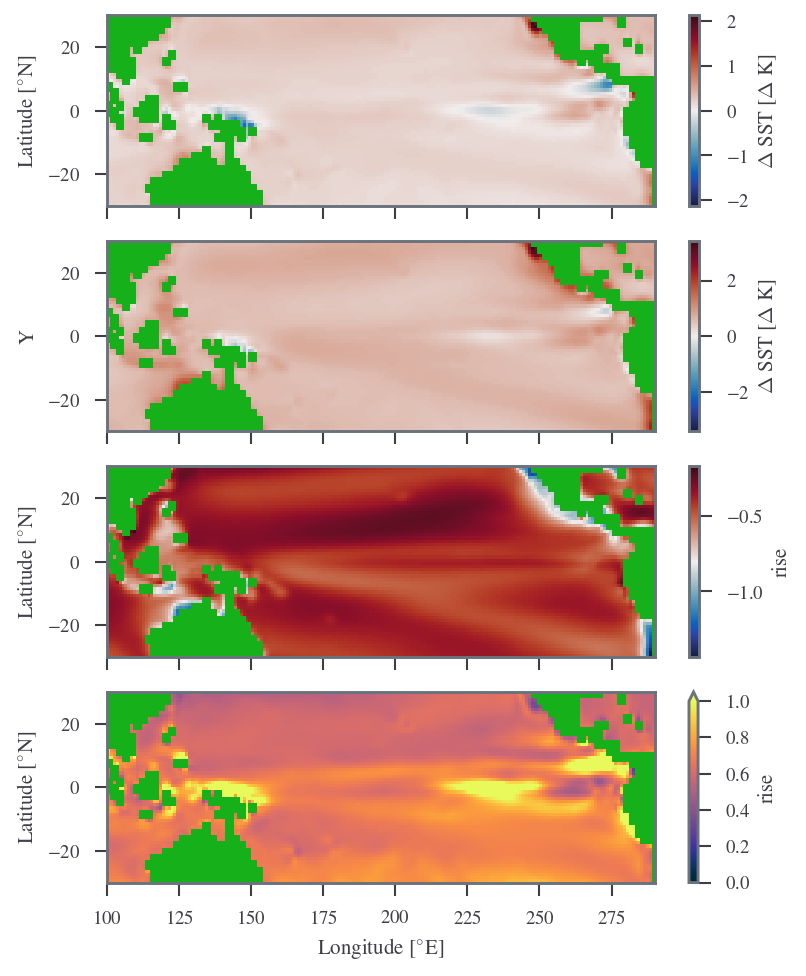

In [221]:
comp_plot(add_units(uc_oc_f1_dt.interp_like(ddata)), uc_oc_dt.interp_like(ddata))
# difference of puttting ingrid on

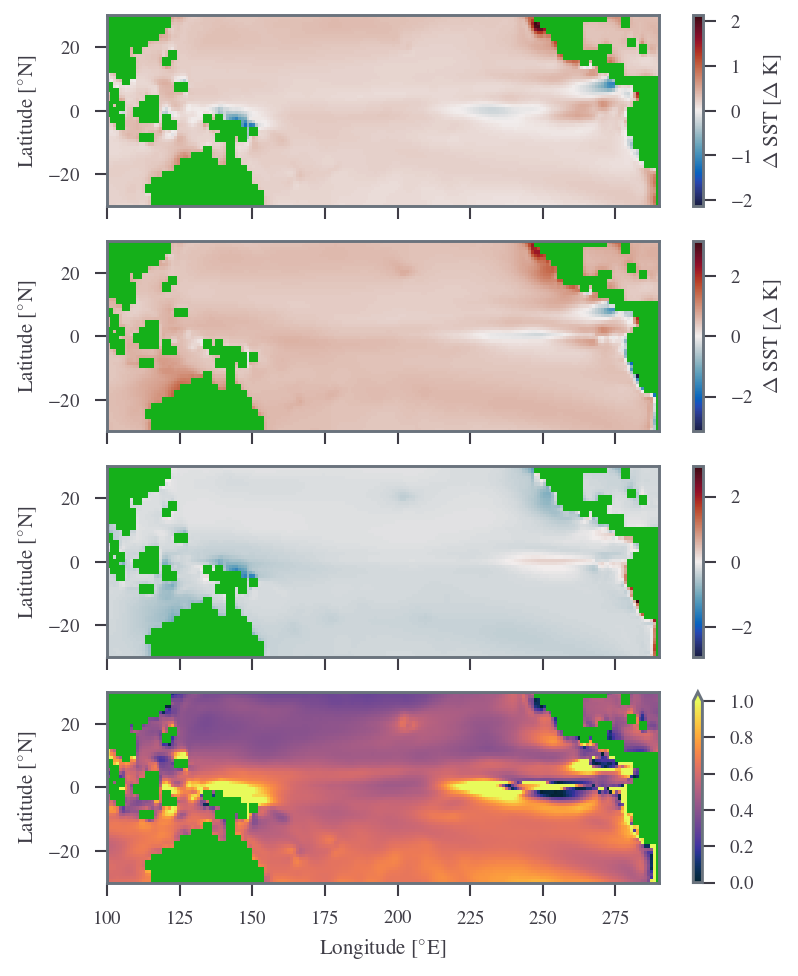

In [222]:
comp_plot(add_units(uc_oc_f1_dt.interp_like(ddata)), ddata)

In [167]:
uc_oc_dt = add_units(get_trend(clip(can_coords(uc_oc.SST_SST))).isel(Z=0).drop("Z"))
uc_oc_dt.attrs["units"] = "$\Delta$ K"
uc_oc_dt.attrs["long_name"] = r"$\Delta$ SST"

In [170]:
ddata = add_units(sel(can_coords(fig_data["ForcedOceanModel.sst-trend-Fig_1d.nc.SST"])))
ddata = ddata.where(ddata!=0.0).rename(r"$\Delta$ SST")
ddata.attrs["units"] = "$\Delta$ K"
ddata.attrs["long_name"] = r"$\Delta$ SST"

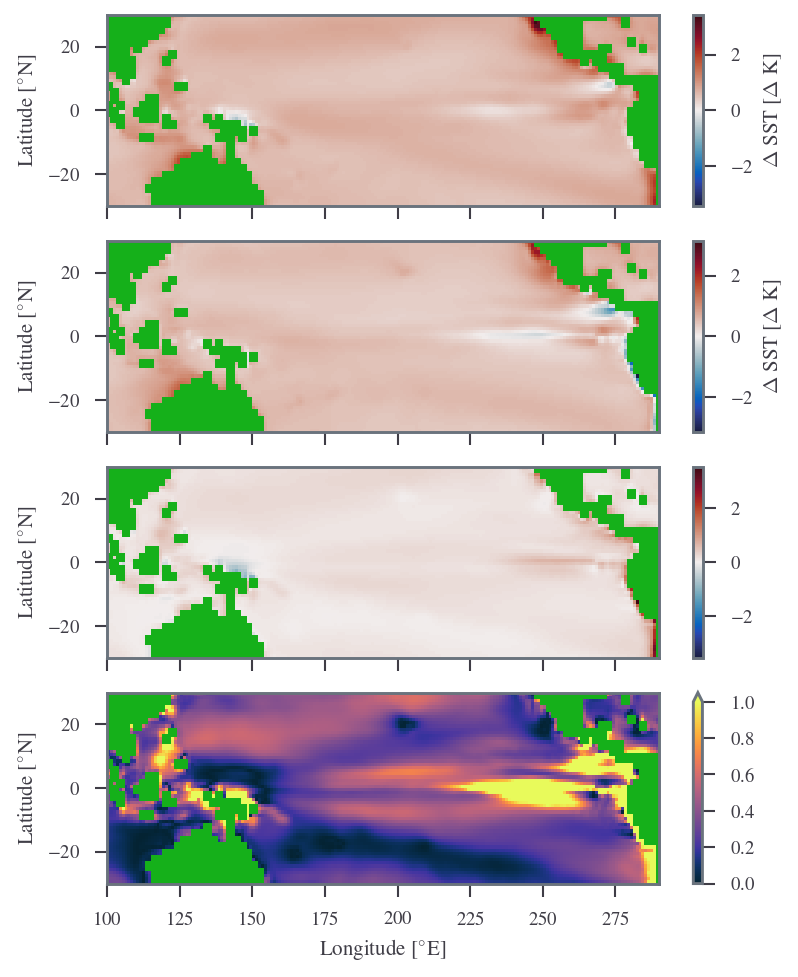

In [171]:
comp_plot(add_units(uc_oc_dt.interp_like(ddata)), ddata)

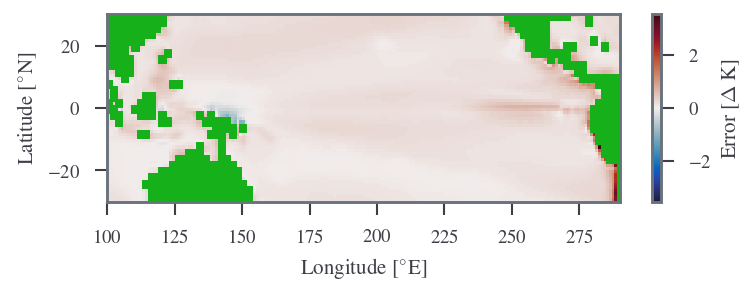

In [105]:
diff = (uc_oc_dt.interp_like(ddata) - ddata)
diff.attrs["units"] = "$\Delta$ K"
diff.attrs["long_name"] = r"Error"
add_units(diff).plot(
    aspect=3, cmap=cmap("delta"), figsize=get_dim(ratio=0.3)
)
# our model is too hot at the cold tongue?
# also too cold of Papua New Guniea
# errors about or half a degree in the worst areas not directly on the coast

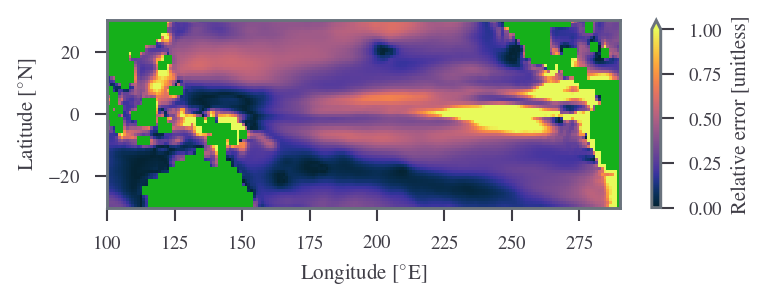

In [107]:
rel_diff = (np.abs((uc_oc_dt.interp_like(ddata) - ddata) / ddata))
rel_diff.attrs["units"] = "unitless"
rel_diff.attrs["long_name"] = r"Relative error"
add_units(rel_diff).plot(
    aspect=3, vmin=0, vmax=1, cmap=cmap("sst"), figsize=get_dim(ratio=0.3)
)
# pretty terrible error margins of the coast, on the cold tongue

# Figure 2d

In [223]:
uc_atm = open_dataset(uncoup_setup.tcam_output())
uc_f1_atm = open_dataset(uc_f1_stp.tcam_output())

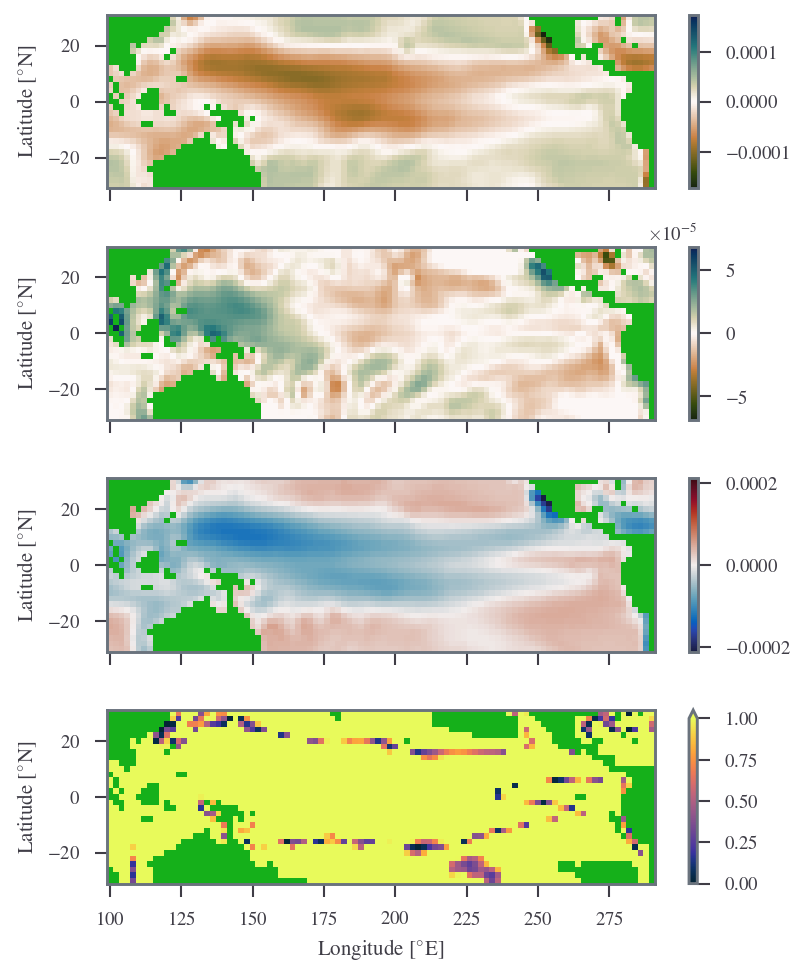

In [226]:
comp_plot(prtrend_f1, prtrend_o, default_cmap="ranom")

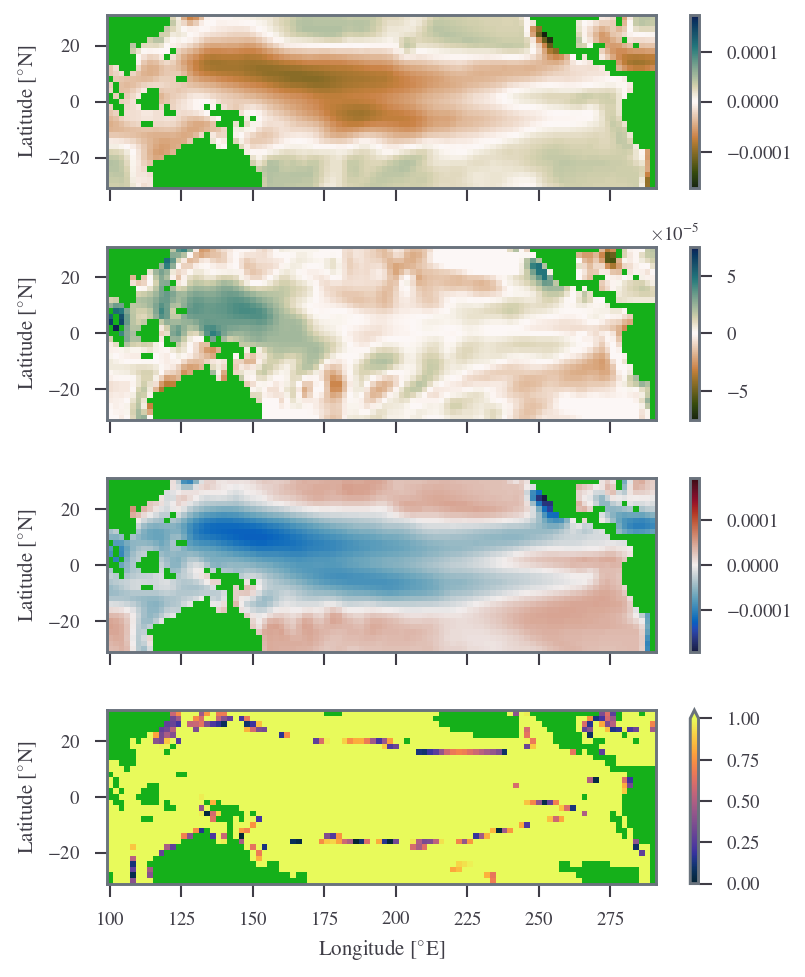

In [225]:
prtrend_f1 = clip(can_coords(uc2_atm.PRtrend))
prtrend_p = clip(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"]))
comp_plot(prtrend_f1, prtrend_p, default_cmap="ranom")

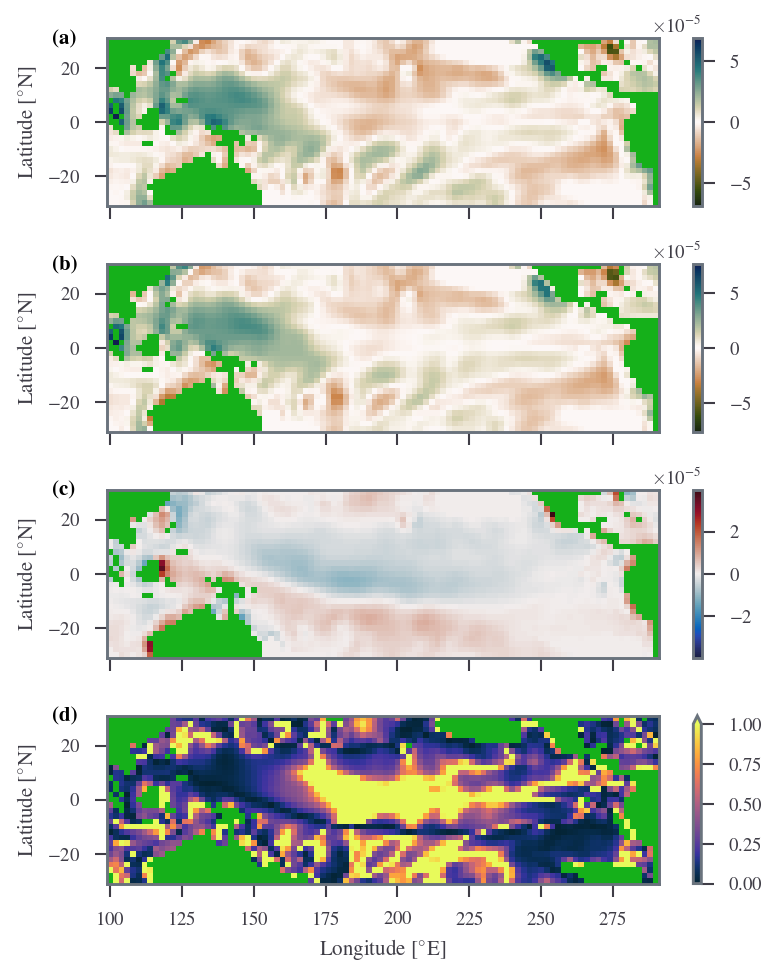

In [231]:
prtrend_o = clip(can_coords(uc_atm.PRtrend))
prtrend_p = clip(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"]))
comp_plot(prtrend_o, prtrend_p, default_cmap="ranom")

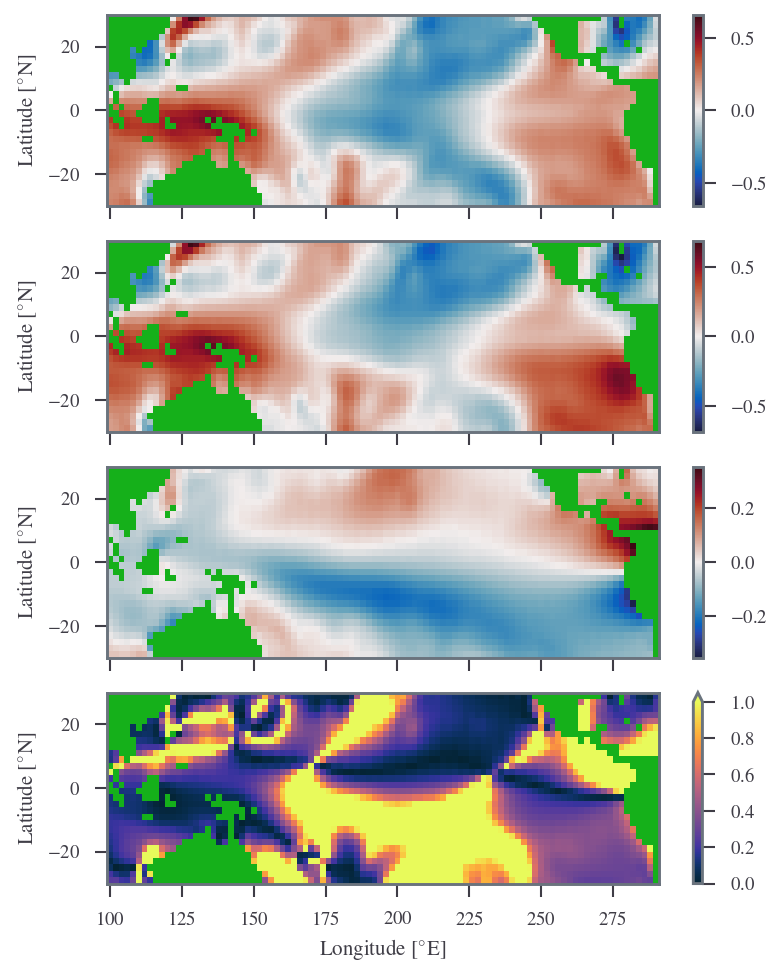

In [193]:
vtrend_o = clip(can_coords(uc_atm.vtrend))
vtrend_p = clip(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.vtrend"]))
comp_plot(vtrend_o, vtrend_p)

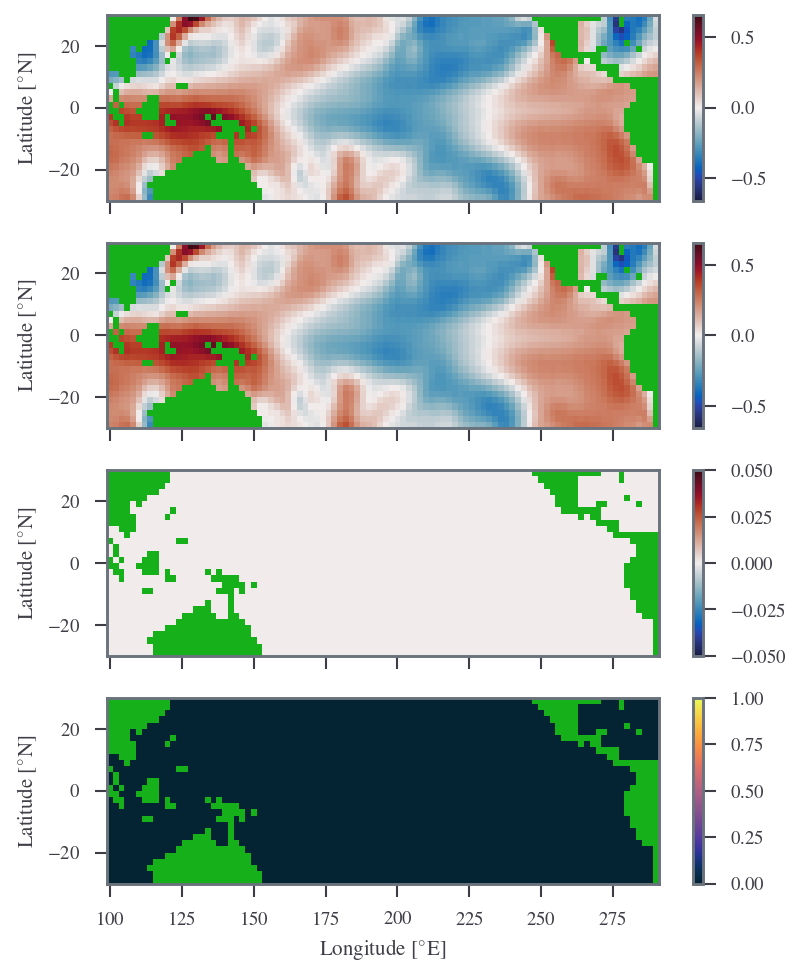

In [194]:
comp_plot(vtrend_o, vtrend_2)

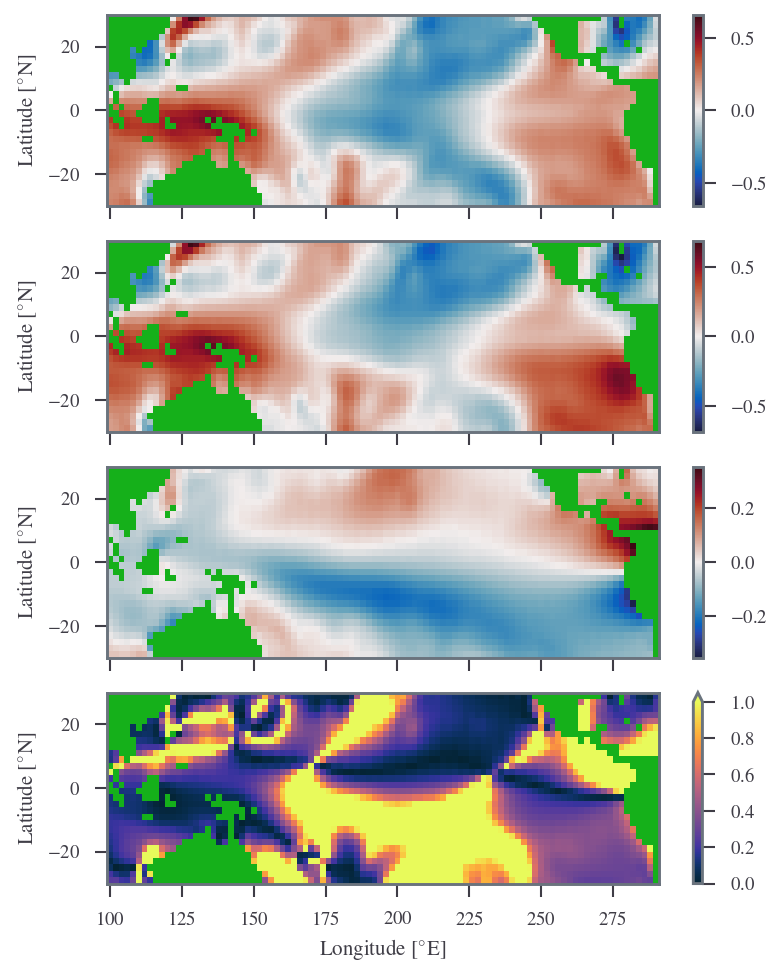

In [181]:
vtrend_2 = clip(can_coords(uc2_atm.vtrend))
vtrend_p = clip(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.vtrend"]))
comp_plot(vtrend_2, vtrend_p)

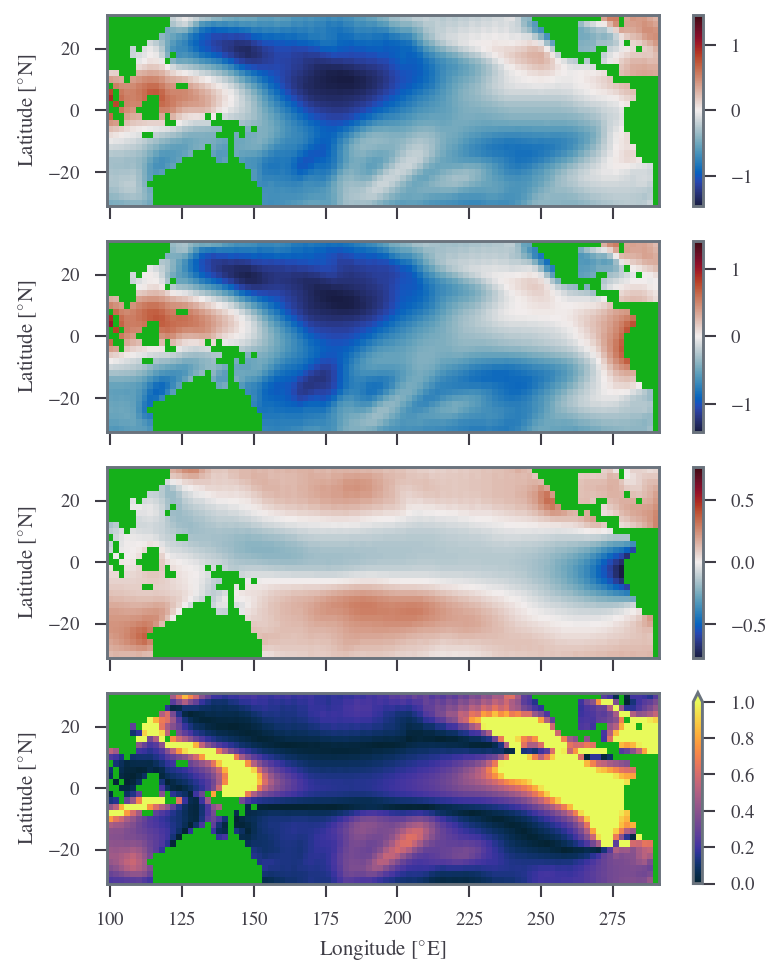

In [155]:
utrend_o = clip(can_coords(uc_atm.utrend))
utrend_p = clip(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.utrend"]))
comp_plot(utrend_o, utrend_p)

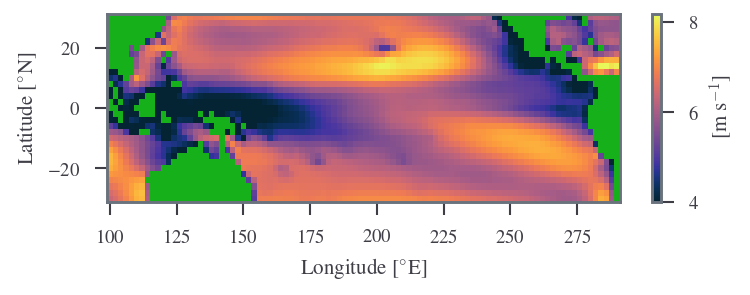

In [114]:
wsp = clip(can_coords(uncoup_atm.wnspClim))
wsp.attrs["units"] = "m s$^{-1}$"
wsp.plot(
    aspect=3, cmap=cmap("sst"), figsize=get_dim(ratio=0.3)
)

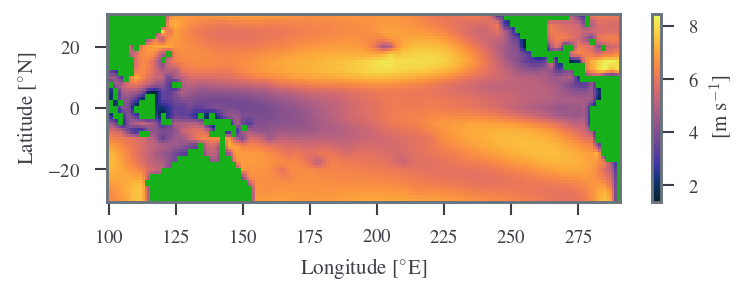

In [121]:
wsp = clip(can_coords(xr.open_dataarray(uncoup_setup.ecmwf_sfcwind())))
wsp.attrs["units"] = "m s$^{-1}$"
wsp.plot(
    aspect=3, cmap=cmap("sst"), figsize=get_dim(ratio=0.3)
)

In [30]:
var_list = []
for var in uncoup_atm:
    var_list.append(var)
print(var_list)

['K', 'epsu', 'epsv', 'hq', 'wnspClim', 'tsClim', 'prClim', 'spClim', 'tsTrend', 'prTrend', 'mask', 'utrend', 'vtrend', 'phitrend', 'tstrend', 'PRtrend', 'Qthtrend', 'uend', 'vend', 'wend', 'phiend', 'tsend', 'PRend', 'Qthend', 'Eend', 'MCend', 'qaend', 'ubeg', 'vbeg', 'wbeg', 'phibeg', 'tsbeg', 'PRbeg', 'Qthbeg', 'Ebeg', 'MCbeg', 'qabeg']


## Figure 3

In [234]:
return_var_list(3)

['CoupledModel.Fig_3.nc.epsu',
 'CoupledModel.Fig_3.nc.epsv',
 'CoupledModel.Fig_3.nc.Hq',
 'CoupledModel.Fig_3.nc.K',
 'CoupledModel.Fig_3.nc.mask',
 'CoupledModel.Fig_3.nc.phitrend',
 'CoupledModel.Fig_3.nc.prClim',
 'CoupledModel.Fig_3.nc.PRtrend',
 'CoupledModel.Fig_3.nc.prTrend',
 'CoupledModel.Fig_3.nc.Qthtrend',
 'CoupledModel.Fig_3.nc.spClim',
 'CoupledModel.Fig_3.nc.tsClim',
 'CoupledModel.Fig_3.nc.tsTrend',
 'CoupledModel.Fig_3.nc.tstrend',
 'CoupledModel.Fig_3.nc.utrend',
 'CoupledModel.Fig_3.nc.vtrend',
 'CoupledModel.Fig_3.nc.wnspClim']

In [235]:
c_oc = xr.open_dataset(coup_setup.om_run2f_nc(), decode_times=False)
c_atm = xr.open_dataset(coup_setup.tcam_output(), decode_times=False)

In [258]:
np.all(
    clip(can_coords(fig_data["CoupledModel.Fig_3.nc.tsTrend"])).values
    == clip(can_coords(fig_data["CoupledModel.Fig_3.nc.tstrend"])).values
)

False

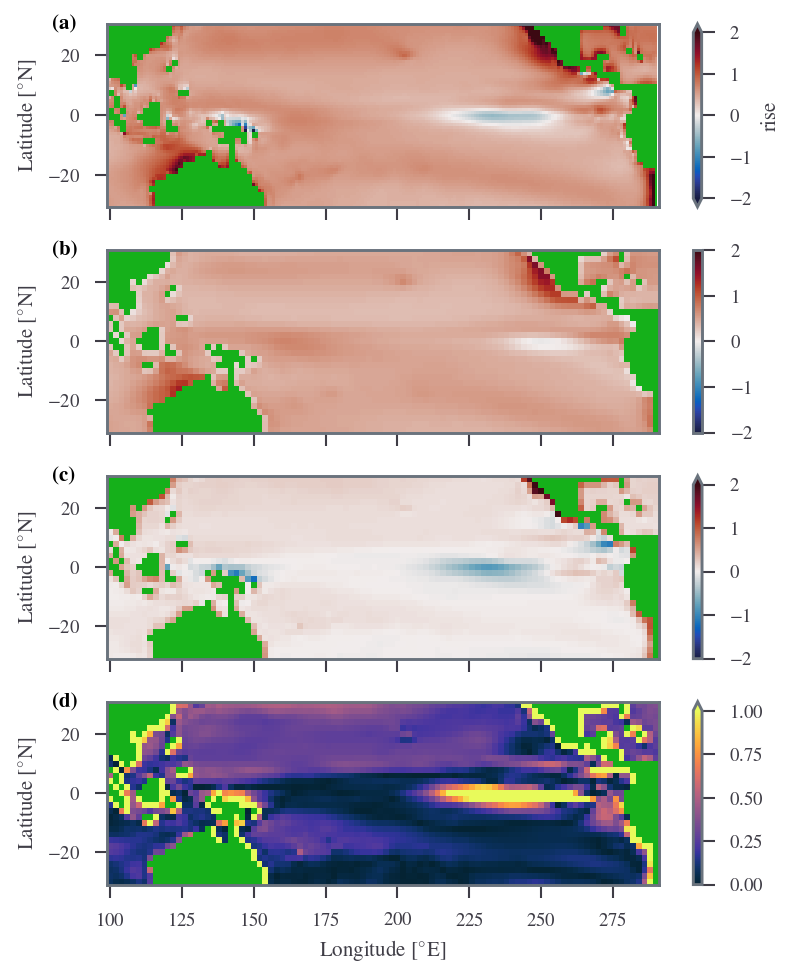

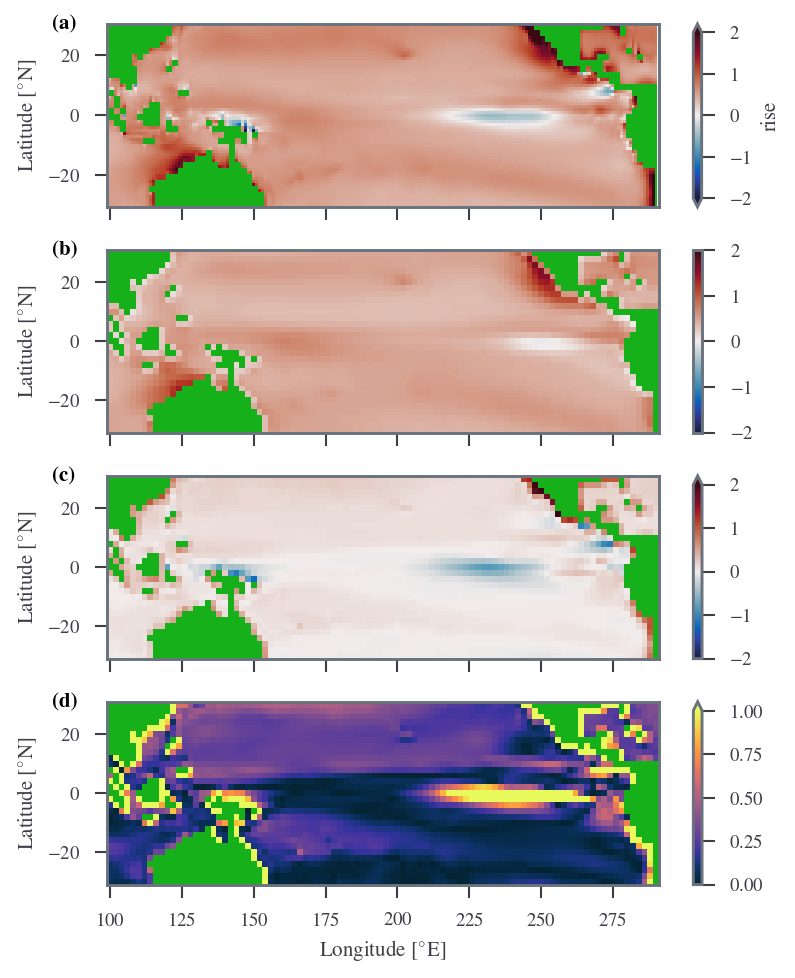

In [275]:
ts_trend_o = get_trend(clip(can_coords(c_oc.SST_SST).isel(Z=0).drop("Z")))
for i in ["CoupledModel.Fig_3.nc.tstrend", "CoupledModel.Fig_3.nc.tsTrend"]:
    ts_trend_p = clip(can_coords(fig_data[i]))
    comp_plot(ts_trend_o, ts_trend_p, vmin=-2, vmax=2)

CoupledModel.Fig_3.nc.PRtrend
CoupledModel.Fig_3.nc.prTrend


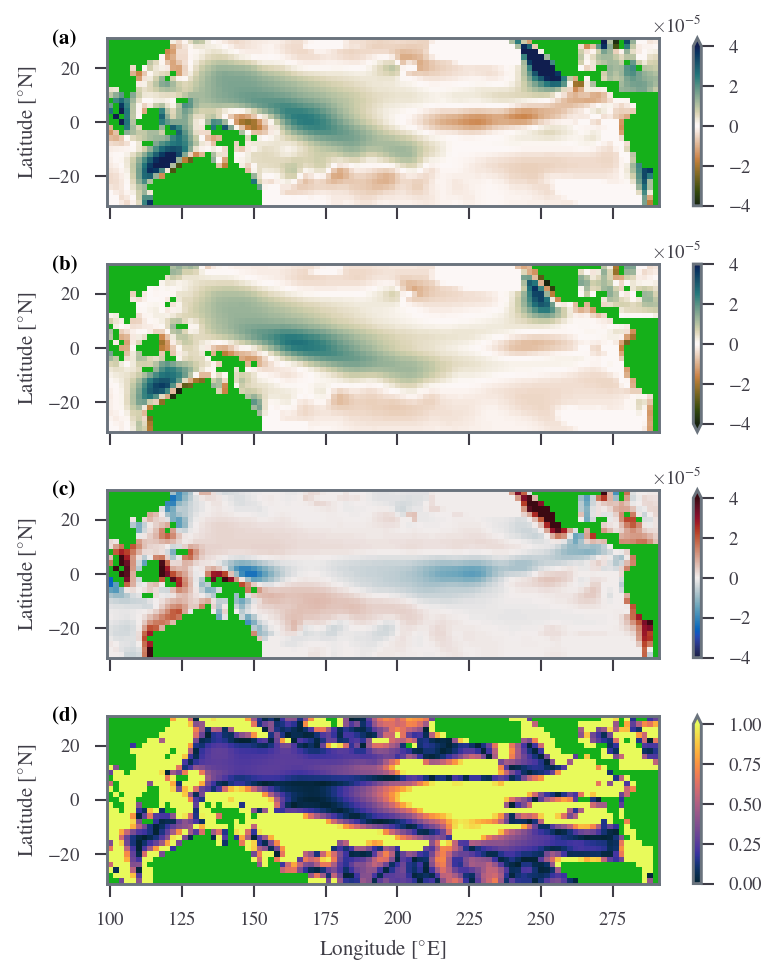

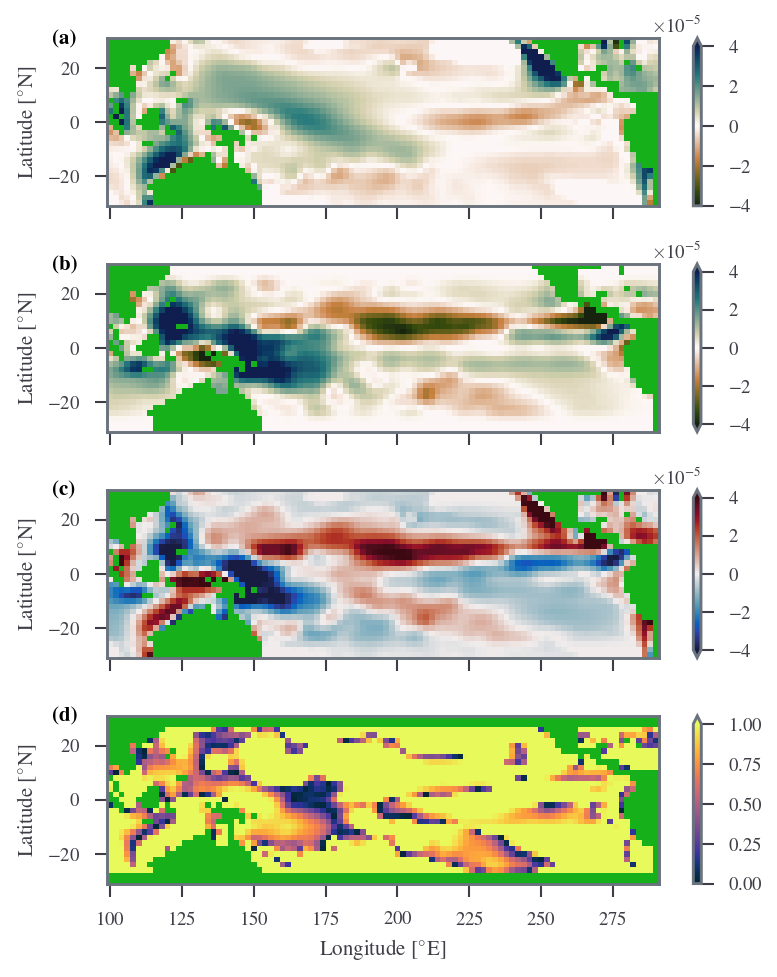

In [274]:
# isn't giving two sets of results cheating?
pr_trend_o = clip(can_coords(c_atm["PRtrend"]))
for i in ['CoupledModel.Fig_3.nc.PRtrend', 'CoupledModel.Fig_3.nc.prTrend']:
    pr_trend_p = clip(can_coords(fig_data[i]))
    print(i)
    comp_plot(pr_trend_o, pr_trend_p, default_cmap="ranom", vmin=-4e-5, vmax=4e-5)

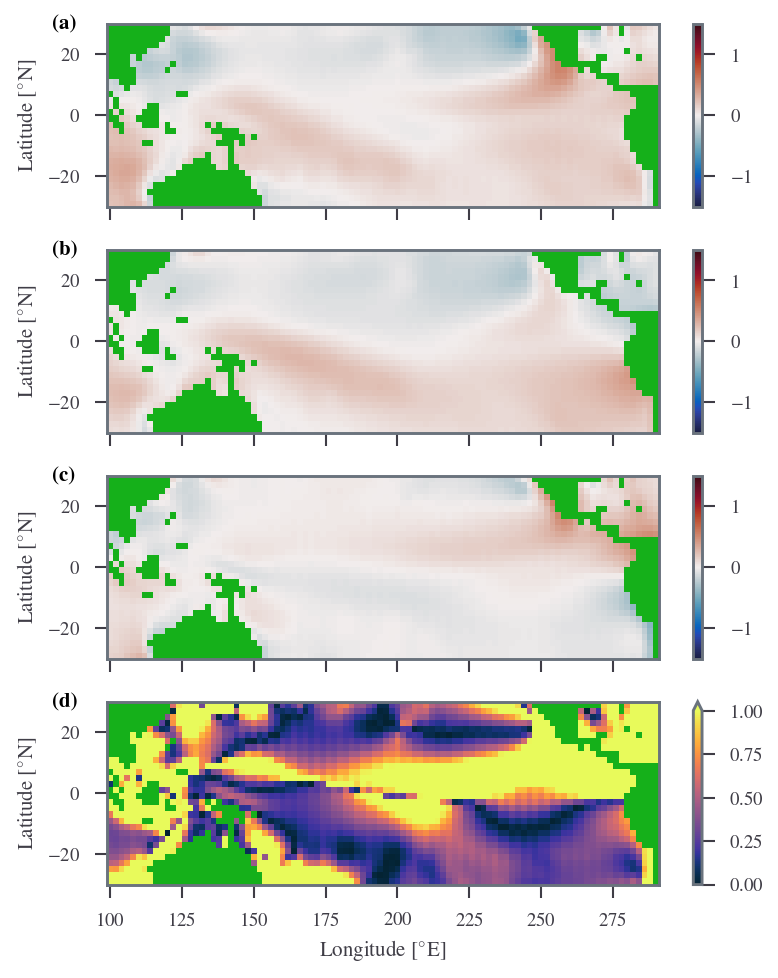

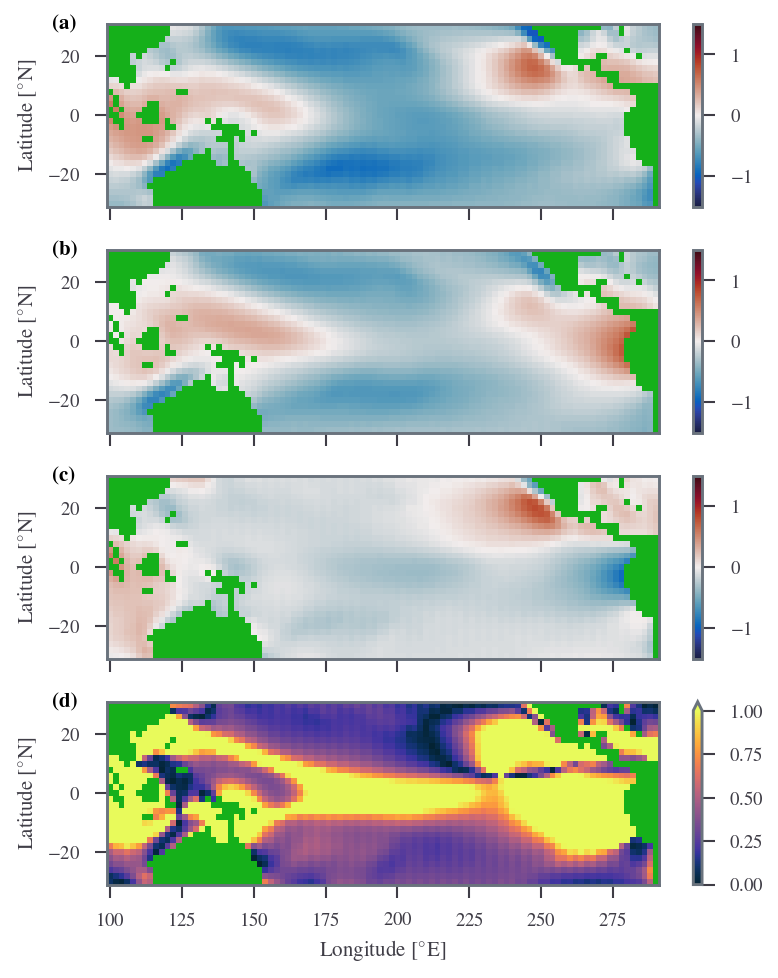

In [279]:
for v in ["vtrend", "utrend"]:
    # isn't giving two sets of results cheating?
    v_o = clip(can_coords(c_atm[v]))
    v_p = clip(can_coords(fig_data["CoupledModel.Fig_3.nc." + v]))
    comp_plot(v_o, v_p, vmin=-1.5, vmax=1.5)

## Figure 4

In [281]:
return_var_list(4)

['CoupledModel.HTHERM-trend-Fig_4c.nc.HTHERM',
 'ForcedOceanModel.HTHERM-trend-Fig_4b.nc.HTHERM']

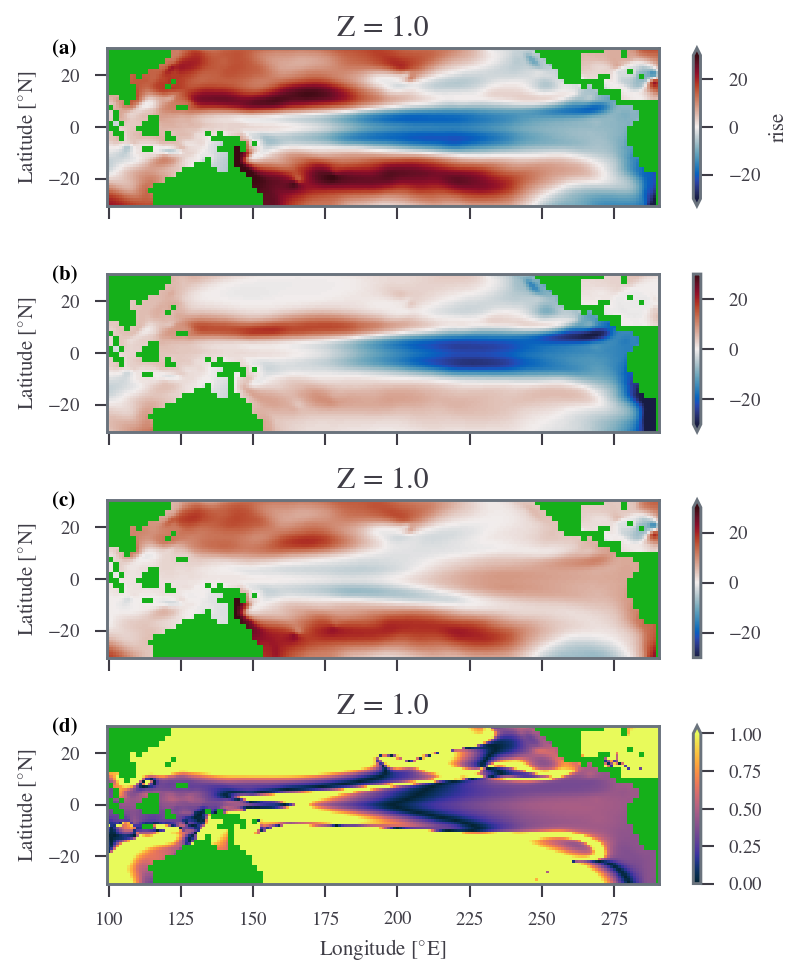

In [294]:
therm_o = get_trend(clip(can_coords(uc_oc.TDEEP_HMODEL)))
therm_p = clip(can_coords(fig_data["ForcedOceanModel.HTHERM-trend-Fig_4b.nc.HTHERM"]))
comp_plot(therm_o, therm_p, vmin=-30, vmax=30)

In [ ]:
c_oc = xr.open_dataset(coup_setup.om_run2f_nc(), decode_times=False)

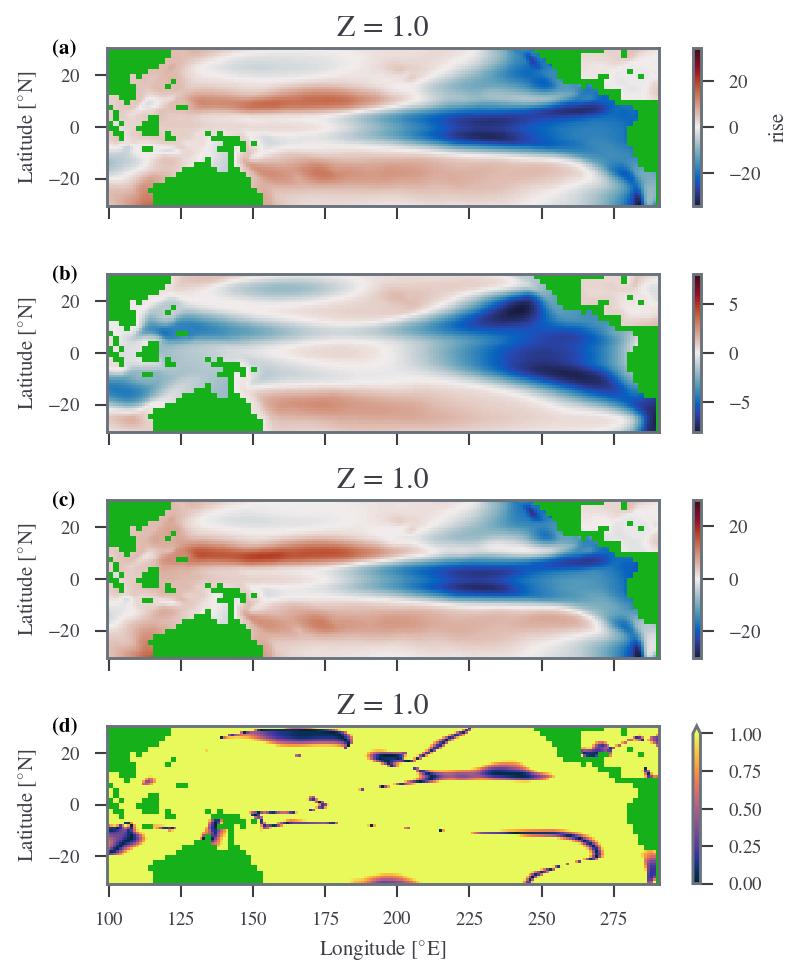

In [288]:
therm_o = get_trend(clip(can_coords(c_oc.TDEEP_HTHERM)))
therm_p = clip(can_coords(fig_data["CoupledModel.HTHERM-trend-Fig_4c.nc.HTHERM"]))
comp_plot(therm_o, therm_p)

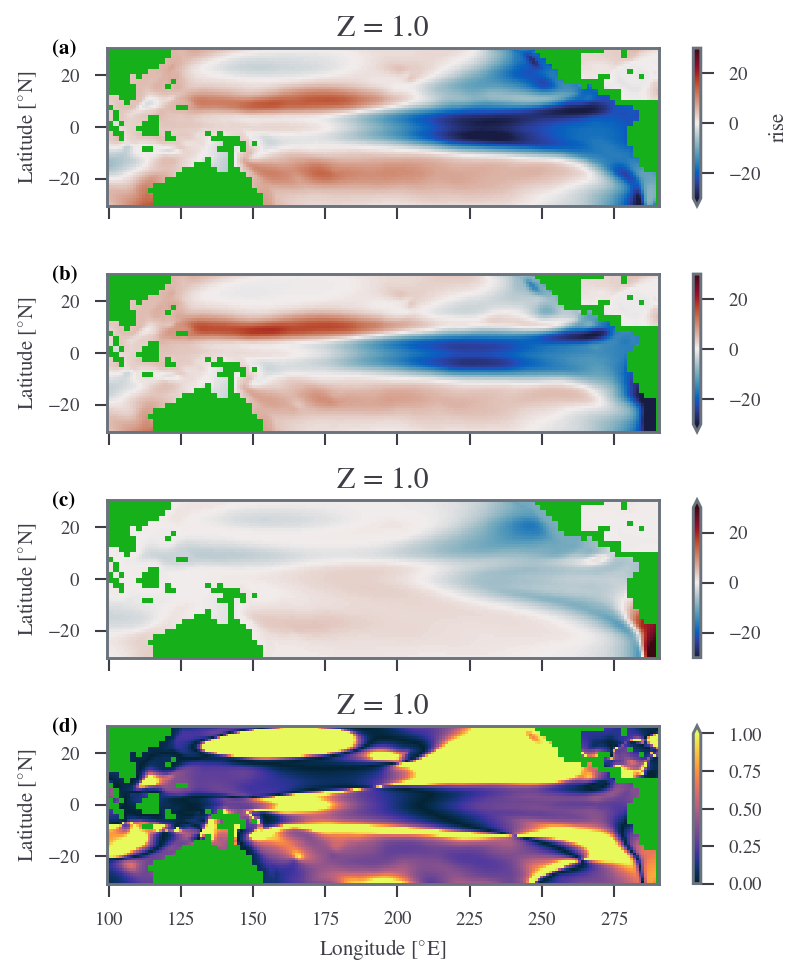

In [296]:
therm_o = get_trend(clip(can_coords(c_oc.TDEEP_HTHERM)))
therm_p = clip(can_coords(fig_data["ForcedOceanModel.HTHERM-trend-Fig_4b.nc.HTHERM"]))
comp_plot(therm_o, therm_p, vmin=-30, vmax=30)

# Figure 5

In [300]:
[l for l in return_var_list(5) if "5a" in l]

['CoupledModel.Fig_5a.nc.epsu',
 'CoupledModel.Fig_5a.nc.epsv',
 'CoupledModel.Fig_5a.nc.Hq',
 'CoupledModel.Fig_5a.nc.K',
 'CoupledModel.Fig_5a.nc.mask',
 'CoupledModel.Fig_5a.nc.phitrend',
 'CoupledModel.Fig_5a.nc.prClim',
 'CoupledModel.Fig_5a.nc.PRtrend',
 'CoupledModel.Fig_5a.nc.prTrend',
 'CoupledModel.Fig_5a.nc.Qthtrend',
 'CoupledModel.Fig_5a.nc.spClim',
 'CoupledModel.Fig_5a.nc.tsClim',
 'CoupledModel.Fig_5a.nc.tsTrend',
 'CoupledModel.Fig_5a.nc.tstrend',
 'CoupledModel.Fig_5a.nc.utrend',
 'CoupledModel.Fig_5a.nc.vtrend',
 'CoupledModel.Fig_5a.nc.wnspClim',
 'CoupledModel.rh-Fig_5a.nc.rh']

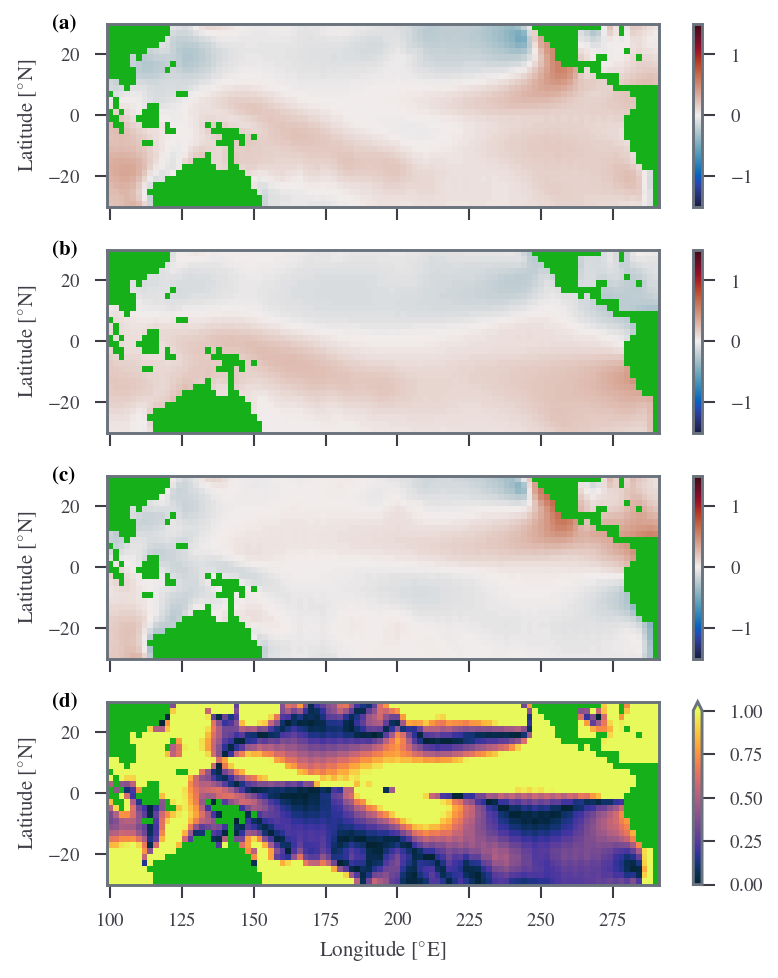

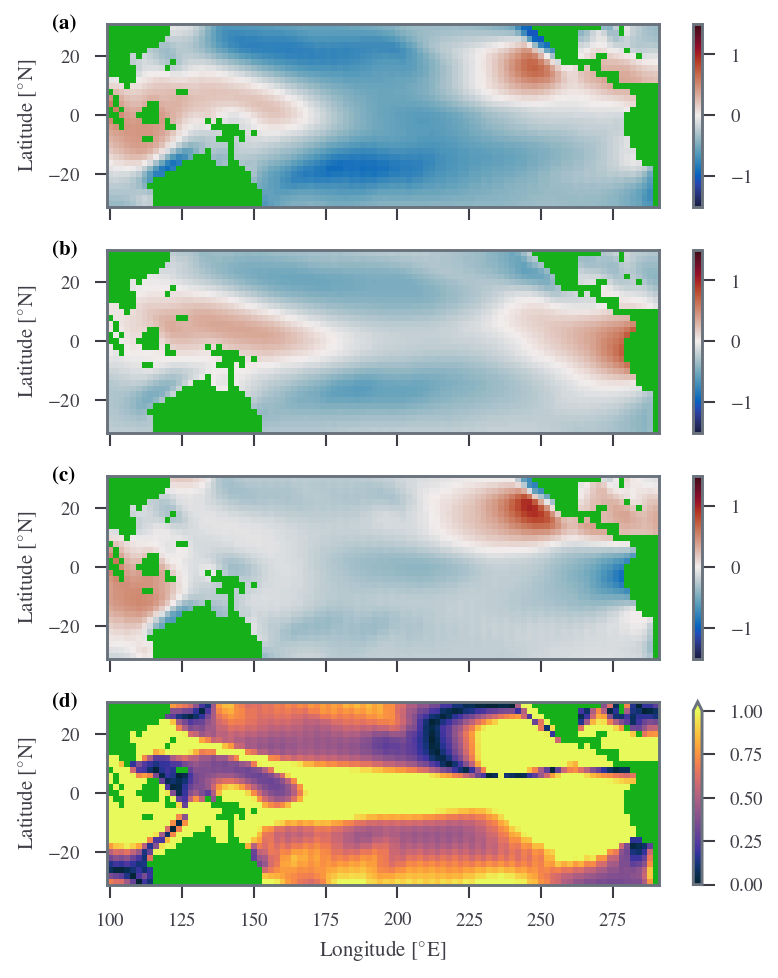

In [301]:
for v in ["vtrend", "utrend"]:
    # isn't giving two sets of results cheating?
    v_o = clip(can_coords(c_atm[v]))
    v_p = clip(can_coords(fig_data["CoupledModel.Fig_5a.nc." + v]))
    comp_plot(v_o, v_p, vmin=-1.5, vmax=1.5)

CoupledModel.Fig_5a.nc.PRtrend


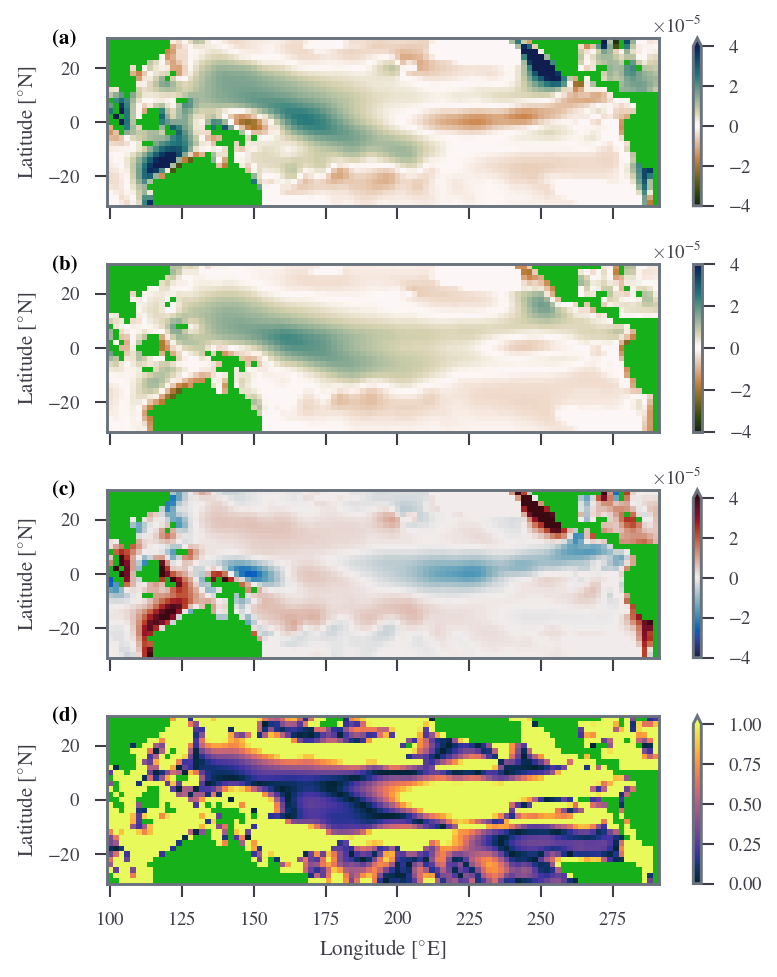

In [302]:
v = "PRtrend"
pr_trend_o = clip(can_coords(c_atm[v]))
for i in ["CoupledModel.Fig_5a.nc." + v]:
    pr_trend_p = clip(can_coords(fig_data[i]))
    print(i)
    comp_plot(pr_trend_o, pr_trend_p, default_cmap="ranom", vmin=-4e-5, vmax=4e-5)